# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Example 1: 8-Queens Using Pre-Defined Fitness Function

In [4]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.Queens()

In [5]:
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=False, max_val=8)

In [36]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [7]:
# Solve using simulated annealing - attempt 1         
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [8]:
print('The best state found is: ', best_state)

The best state found is:  [6 3 7 2 1 5 2 5]


In [9]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  3.0


In [10]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [11]:
print(best_state)

[4 2 0 6 1 7 5 3]


In [12]:
print(best_fitness)

0.0


### Example 2: 8-Queens Using Custom Fitness Function

In [4]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [5]:
# Check function is working correctly
state = np.array([1, 4, 1, 3, 5, 5, 2, 7])

# The fitness of this state should be 22
queens_max(state)

22

In [6]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)

In [7]:

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [8]:
# Solve using simulated annealing - attempt 1
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 10, max_iters = 1000, 
                                                      init_state = None, random_state = 1)

NameError: name 'schedule' is not defined

In [9]:
print(best_state)

NameError: name 'best_state' is not defined

In [10]:
print(best_fitness)

NameError: name 'best_fitness' is not defined

In [20]:
print (len(eval_curves))

295


In [21]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1)

In [19]:
print(best_state)

[4 1 3 5 7 2 0 6]


In [20]:
print(best_fitness)

28.0


# 8 Queens Greedy Search

In [11]:
  
import mlrose_hiive
from mlrose_hiive.decorators import short_name

from mlrose_hiive.runners._runner_base import _RunnerBase
from mlrose_hiive.runners.rhc_runner import RHCRunner
from mlrose_hiive.runners.sa_runner import SARunner
from mlrose_hiive.runners.ga_runner import GARunner
from mlrose_hiive.runners.mimic_runner import MIMICRunner

In [12]:
random_state = [1,42,  100]

In [13]:
#### RHC
experiment_name = 'example_experiment'
problem = problem_cust
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=100,
                iteration_list=range(0, 1000,100),
                max_attempts=100,
                restart_list=[ 5, 10,15, 20, 25, 30])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run()    

Running rhc
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[22.0000]
	[0 0 3 7 7 7 0 2]...

restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[76], iteration:[100], done:[False], time:[0.02], fitness:[27.0000]
	[5 1 6 4 7 7 0 2]...

restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[125], done:[True], time:[0.03], fitness:[27.0000]
	[5 1 6 4 7 7 0 2]...

restarts:[5], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[23.0000]
	[1 2 5 4 7 0 3 6]...

restarts:[5], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], atte

restarts:[10], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[106], done:[True], time:[0.56], fitness:[25.0000]
	[2 0 5 1 6 4 7 7]...

restarts:[10], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.60], fitness:[21.0000]
	[2 0 6 4 4 6 1 2]...

restarts:[10], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[38], iteration:[100], done:[False], time:[0.62], fitness:[27.0000]
	[2 0 7 0 4 6 1 5]...

restarts:[10], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[163], done:[True], time:[0.67], fitness:[27.0000]
	[2 0 7 0 4 6 1 5]...

restarts:[10], max_iters:[900], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.70], fitness

restarts:[15], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.28], fitness:[21.0000]
	[6 7 4 7 3 6 1 7]...

restarts:[15], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[54], iteration:[100], done:[False], time:[1.30], fitness:[26.0000]
	[6 4 2 7 3 6 1 5]...

restarts:[15], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[147], done:[True], time:[1.36], fitness:[26.0000]
	[6 4 2 7 3 6 1 5]...

restarts:[15], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.42], fitness:[17.0000]
	[6 6 5 7 3 2 6 3]...

restarts:[15], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[27], iteration:[100], done:[False], time:[1.45], fi

restarts:[20], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[163], done:[True], time:[1.40], fitness:[27.0000]
	[2 0 7 0 4 6 1 5]...

restarts:[20], max_iters:[900], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.47], fitness:[20.0000]
	[4 5 7 3 5 0 0 1]...

restarts:[20], max_iters:[900], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[50], iteration:[100], done:[False], time:[1.49], fitness:[27.0000]
	[4 7 0 3 5 2 1 6]...

restarts:[20], max_iters:[900], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[151], done:[True], time:[1.57], fitness:[27.0000]
	[4 7 0 3 5 2 1 6]...

restarts:[20], max_iters:[900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.64], fitnes

restarts:[25], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.22], fitness:[23.0000]
	[1 2 5 4 7 0 3 6]...

restarts:[25], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[100], done:[False], time:[0.24], fitness:[27.0000]
	[7 2 4 1 7 0 3 6]...

restarts:[25], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[199], done:[True], time:[0.34], fitness:[27.0000]
	[7 2 4 1 7 0 3 6]...

restarts:[25], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.43], fitness:[20.0000]
	[2 4 5 1 7 4 5 1]...

restarts:[25], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[50], iteration:[100], done:[False], time:[0.44], fitness:

restarts:[25], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.41], fitness:[17.0000]
	[0 4 3 2 1 3 3 0]...

restarts:[25], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[46], iteration:[100], done:[False], time:[3.43], fitness:[27.0000]
	[0 3 6 2 7 1 4 0]...

restarts:[25], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[155], done:[True], time:[3.56], fitness:[27.0000]
	[0 3 6 2 7 1 4 0]...

restarts:[25], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.67], fitness:[20.0000]
	[2 6 1 3 6 1 4 6]...

restarts:[25], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[53], iteration:[100], done:[False], time:[3.69], fi

restarts:[30], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[151], done:[True], time:[0.70], fitness:[27.0000]
	[2 5 3 1 7 4 6 3]...

restarts:[30], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.84], fitness:[15.0000]
	[3 4 6 3 0 3 3 3]...

restarts:[30], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[100], done:[False], time:[0.86], fitness:[27.0000]
	[2 7 1 4 0 0 3 5]...

restarts:[30], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[200], done:[True], time:[0.98], fitness:[27.0000]
	[2 7 1 4 0 0 3 5]...

restarts:[30], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.12], fitness:

restarts:[30], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[53], iteration:[100], done:[False], time:[5.02], fitness:[27.0000]
	[4 7 0 3 6 1 5 2]...

restarts:[30], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[148], done:[True], time:[5.18], fitness:[27.0000]
	[4 7 0 3 6 1 5 2]...

restarts:[30], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.32], fitness:[24.0000]
	[2 7 0 3 1 4 6 1]...

restarts:[30], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[16], iteration:[100], done:[False], time:[5.34], fitness:[27.0000]
	[2 7 5 1 1 4 6 3]...

restarts:[30], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[185], done:[True], time:[5.52],

restarts:[30], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[123], done:[True], time:[9.90], fitness:[26.0000]
	[2 1 5 7 0 6 3 6]...

restarts:[30], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[10.05], fitness:[22.0000]
	[3 7 2 1 7 5 1 4]...

restarts:[30], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[30], iteration:[100], done:[False], time:[10.08], fitness:[28.0000]
	[2 7 3 6 0 5 1 4]...

restarts:[30], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[171], done:[True], time:[10.28], fitness:[28.0000]
	[2 7 3 6 0 5 1 4]...

***************
*** Run END ***
***************
Run time: 24.202386
Saving: [8queens_rhc.csv\example_experiment\rhc__example_experiment__run_stats_df.csv]
Saving: [

In [17]:
df_run_stats.to_csv('nqueens_rhc_2.csv', index=False)

In [18]:
def avg_rhc_runner(random_state):
    
    rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=0,
                iteration_list=range(0,1000,100),
                max_attempts=100,
                restart_list=[ 5, 10, 15, 20, 25, 30]) 
    df_run_stats, _ = rhc.run()
    df_run_stats['seed'] = 0
    for i in random_state:
        rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=i,
                iteration_list=range(0,1000,100),
                max_attempts=100,
                restart_list=[ 5, 10, 15, 20, 25, 30, 50]) 
        
        
        df_run_stats_local, _ = rhc.run()
        df_run_stats_local['seed'] = i 
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats
    

In [19]:
agg = avg_rhc_runner([1,42,100])

Running rhc
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[92], iteration:[100], done:[False], time:[0.01], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[109], done:[True], time:[0.03], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

restarts:[5], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[18.0000]
	[5 5 3 1 0 0 4 3]...

restarts:[5], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], atte

restarts:[10], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.49], fitness:[20.0000]
	[6 2 1 3 7 3 6 6]...

restarts:[10], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[15], iteration:[100], done:[False], time:[0.50], fitness:[27.0000]
	[4 2 7 5 7 0 6 3]...

restarts:[10], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[186], done:[True], time:[0.56], fitness:[27.0000]
	[4 2 7 5 7 0 6 3]...

restarts:[10], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.60], fitness:[21.0000]
	[4 1 0 7 6 6 0 1]...

restarts:[10], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[81], iteration:[100], done:[False], time:[0.61], fitness

restarts:[15], max_iters:[900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.07], fitness:[18.0000]
	[1 4 3 7 6 5 4 1]...

restarts:[15], max_iters:[900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[35], iteration:[100], done:[False], time:[1.09], fitness:[26.0000]
	[1 5 2 6 7 0 4 0]...

restarts:[15], max_iters:[900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[166], done:[True], time:[1.16], fitness:[26.0000]
	[1 5 2 6 7 0 4 0]...

restarts:[15], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.21], fitness:[18.0000]
	[3 4 1 0 2 1 4 1]...

restarts:[15], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[28], iteration:[100], done:[False], time:[1.22], fi

restarts:[20], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[186], done:[True], time:[1.06], fitness:[27.0000]
	[4 2 7 5 7 0 6 3]...

restarts:[20], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.13], fitness:[21.0000]
	[4 1 0 7 6 6 0 1]...

restarts:[20], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[81], iteration:[100], done:[False], time:[1.15], fitness:[27.0000]
	[3 4 0 7 5 2 6 1]...

restarts:[20], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[120], done:[True], time:[1.21], fitness:[27.0000]
	[3 4 0 7 5 2 6 1]...

restarts:[20], max_iters:[900], current_restart:[9]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.27], fitness

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[25], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

restarts:[25], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[92], iteration:[100], done:[False], time:[0.01], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

restarts:[25], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[109], done:[True], time:[0.12], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

restarts:[25], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.22], fitness:[18.0000]
	[5 5 3 1 0 0 4 3]...

restarts:[25], max_iters:[900], current_restart:[1]
runner_name:[rhc], e

restarts:[25], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.00], fitness:[23.0000]
	[3 2 2 4 7 0 0 5]...

restarts:[25], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[85], iteration:[100], done:[False], time:[3.02], fitness:[25.0000]
	[3 6 2 4 7 0 0 5]...

restarts:[25], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[116], done:[True], time:[3.13], fitness:[25.0000]
	[3 6 2 4 7 0 0 5]...

restarts:[25], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.25], fitness:[22.0000]
	[2 7 0 2 0 5 0 6]...

restarts:[25], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[36], iteration:[100], done:[False], time:[3.28], fi

restarts:[30], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[195], done:[True], time:[0.35], fitness:[27.0000]
	[1 1 5 7 2 0 3 6]...

restarts:[30], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.46], fitness:[20.0000]
	[7 3 7 0 5 3 3 6]...

restarts:[30], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[72], iteration:[100], done:[False], time:[0.48], fitness:[27.0000]
	[7 4 2 0 5 3 0 6]...

restarts:[30], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[129], done:[True], time:[0.61], fitness:[27.0000]
	[7 4 2 0 5 3 0 6]...

restarts:[30], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.74], fitness

restarts:[30], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[165], done:[True], time:[4.38], fitness:[26.0000]
	[4 7 0 2 5 5 1 6]...

restarts:[30], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.51], fitness:[21.0000]
	[0 7 1 1 3 4 6 5]...

restarts:[30], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[62], iteration:[100], done:[False], time:[4.53], fitness:[26.0000]
	[0 7 3 1 6 2 0 5]...

restarts:[30], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[139], done:[True], time:[4.70], fitness:[26.0000]
	[0 7 3 1 6 2 0 5]...

restarts:[30], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.84], fi

restarts:[30], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.95], fitness:[23.0000]
	[6 0 7 4 1 6 5 1]...

restarts:[30], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[79], iteration:[100], done:[False], time:[8.98], fitness:[26.0000]
	[6 3 7 4 1 5 5 1]...

restarts:[30], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[122], done:[True], time:[9.16], fitness:[26.0000]
	[6 3 7 4 1 5 5 1]...

restarts:[30], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.38], fitness:[22.0000]
	[3 3 0 5 2 0 5 1]...

restarts:[30], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[64], iteration:[100], done:[False], time:[9.43], fi

restarts:[10], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.32], fitness:[23.0000]
	[5 2 2 0 7 1 7 1]...

restarts:[10], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[70], iteration:[100], done:[False], time:[0.34], fitness:[27.0000]
	[5 5 2 0 6 4 7 1]...

restarts:[10], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[131], done:[True], time:[0.37], fitness:[27.0000]
	[5 5 2 0 6 4 7 1]...

restarts:[10], max_iters:[900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.40], fitness:[21.0000]
	[3 5 0 0 5 6 6 6]...

restarts:[10], max_iters:[900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[49], iteration:[100], done:[False], time:[0.42], fitness

restarts:[15], max_iters:[900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[152], done:[True], time:[0.68], fitness:[26.0000]
	[7 5 0 5 1 6 6 2]...

restarts:[15], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.73], fitness:[20.0000]
	[2 0 3 2 4 6 7 2]...

restarts:[15], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[19], iteration:[100], done:[False], time:[0.75], fitness:[27.0000]
	[2 5 7 1 4 6 3 0]...

restarts:[15], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[182], done:[True], time:[0.81], fitness:[27.0000]
	[2 5 7 1 4 6 3 0]...

restarts:[15], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.85], fitness

restarts:[20], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.58], fitness:[19.0000]
	[0 2 0 3 2 7 3 5]...

restarts:[20], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[7], iteration:[100], done:[False], time:[0.59], fitness:[26.0000]
	[0 4 1 5 2 7 3 3]...

restarts:[20], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[86], iteration:[200], done:[False], time:[0.68], fitness:[27.0000]
	[0 4 1 5 2 6 3 3]...

restarts:[20], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[215], done:[True], time:[0.75], fitness:[27.0000]
	[0 4 1 5 2 6 3 3]...

restarts:[20], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.80], fitness:

restarts:[20], max_iters:[900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.30], fitness:[22.0000]
	[1 0 3 5 2 6 4 2]...

restarts:[20], max_iters:[900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[18], iteration:[100], done:[False], time:[3.33], fitness:[28.0000]
	[4 0 3 5 7 1 6 2]...

restarts:[20], max_iters:[900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[183], done:[True], time:[3.44], fitness:[28.0000]
	[4 0 3 5 7 1 6 2]...

restarts:[20], max_iters:[900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.53], fitness:[24.0000]
	[7 2 6 4 6 0 5 5]...

restarts:[20], max_iters:[900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[67], iteration:[100], done:[False], time:[3.55], fi

restarts:[25], max_iters:[900], current_restart:[10]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[192], done:[True], time:[2.47], fitness:[28.0000]
	[2 5 7 0 3 6 4 1]...

restarts:[25], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.58], fitness:[20.0000]
	[5 6 3 5 4 4 4 0]...

restarts:[25], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[56], iteration:[100], done:[False], time:[2.60], fitness:[27.0000]
	[7 6 2 5 1 4 0 3]...

restarts:[25], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[145], done:[True], time:[2.70], fitness:[27.0000]
	[7 6 2 5 1 4 0 3]...

restarts:[25], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.81], fi

restarts:[25], max_iters:[900], current_restart:[24]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[124], done:[True], time:[6.37], fitness:[27.0000]
	[0 7 3 0 6 4 1 5]...

restarts:[25], max_iters:[900], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.51], fitness:[17.0000]
	[5 4 4 0 2 0 4 2]...

restarts:[25], max_iters:[900], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[47], iteration:[100], done:[False], time:[6.55], fitness:[27.0000]
	[5 0 6 3 7 2 4 1]...

restarts:[25], max_iters:[900], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[154], done:[True], time:[6.70], fitness:[27.0000]
	[5 0 6 3 7 2 4 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[30], max_iters:[900], current_restart:[0]
runner_name:[

restarts:[30], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[56], iteration:[100], done:[False], time:[3.54], fitness:[27.0000]
	[7 6 2 5 1 4 0 3]...

restarts:[30], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[145], done:[True], time:[3.70], fitness:[27.0000]
	[7 6 2 5 1 4 0 3]...

restarts:[30], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.84], fitness:[19.0000]
	[2 2 0 1 5 7 7 1]...

restarts:[30], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[72], iteration:[100], done:[False], time:[3.87], fitness:[27.0000]
	[4 6 0 3 5 7 2 1]...

restarts:[30], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[129], done:[True], time:[4.03],

restarts:[30], max_iters:[900], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.44], fitness:[17.0000]
	[5 4 4 0 2 0 4 2]...

restarts:[30], max_iters:[900], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[47], iteration:[100], done:[False], time:[8.48], fitness:[27.0000]
	[5 0 6 3 7 2 4 1]...

restarts:[30], max_iters:[900], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[154], done:[True], time:[8.66], fitness:[27.0000]
	[5 0 6 3 7 2 4 1]...

restarts:[30], max_iters:[900], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.83], fitness:[17.0000]
	[7 4 4 6 5 7 7 7]...

restarts:[30], max_iters:[900], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[70], iteration:[100], done:[False], time:[8.87], fi

restarts:[50], max_iters:[900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[152], done:[True], time:[2.68], fitness:[26.0000]
	[7 5 0 5 1 6 6 2]...

restarts:[50], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.86], fitness:[20.0000]
	[2 0 3 2 4 6 7 2]...

restarts:[50], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[19], iteration:[100], done:[False], time:[2.87], fitness:[27.0000]
	[2 5 7 1 4 6 3 0]...

restarts:[50], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[182], done:[True], time:[3.07], fitness:[27.0000]
	[2 5 7 1 4 6 3 0]...

restarts:[50], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.26], fitness

restarts:[50], max_iters:[900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[172], done:[True], time:[8.81], fitness:[26.0000]
	[5 0 1 3 6 3 7 2]...

restarts:[50], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.00], fitness:[21.0000]
	[7 4 5 0 5 6 1 6]...

restarts:[50], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[88], iteration:[100], done:[False], time:[9.03], fitness:[27.0000]
	[2 4 2 0 5 3 1 6]...

restarts:[50], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[113], done:[True], time:[9.23], fitness:[27.0000]
	[2 4 2 0 5 3 1 6]...

restarts:[50], max_iters:[900], current_restart:[22]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.44], fi

restarts:[50], max_iters:[900], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[124], done:[True], time:[15.42], fitness:[26.0000]
	[3 0 2 5 5 1 7 4]...

restarts:[50], max_iters:[900], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[15.64], fitness:[21.0000]
	[0 7 0 4 2 6 2 7]...

restarts:[50], max_iters:[900], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[88], iteration:[100], done:[False], time:[15.69], fitness:[25.0000]
	[0 7 0 4 1 6 5 3]...

restarts:[50], max_iters:[900], current_restart:[34]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[113], done:[True], time:[15.92], fitness:[25.0000]
	[0 7 0 4 1 6 5 3]...

restarts:[50], max_iters:[900], current_restart:[35]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[16.13

restarts:[50], max_iters:[900], current_restart:[46]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[208], done:[True], time:[22.52], fitness:[26.0000]
	[4 3 5 0 2 6 2 7]...

restarts:[50], max_iters:[900], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[22.77], fitness:[20.0000]
	[6 6 6 5 5 0 7 2]...

restarts:[50], max_iters:[900], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[82], iteration:[100], done:[False], time:[22.82], fitness:[26.0000]
	[2 0 6 1 5 0 7 4]...

restarts:[50], max_iters:[900], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[119], done:[True], time:[23.10], fitness:[26.0000]
	[2 0 6 1 5 0 7 4]...

restarts:[50], max_iters:[900], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[23.34

restarts:[10], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[41], iteration:[100], done:[False], time:[0.10], fitness:[27.0000]
	[6 0 3 5 0 2 4 7]...

restarts:[10], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[160], done:[True], time:[0.12], fitness:[27.0000]
	[6 0 3 5 0 2 4 7]...

restarts:[10], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.14], fitness:[20.0000]
	[4 3 5 6 2 1 1 2]...

restarts:[10], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[83], iteration:[100], done:[False], time:[0.15], fitness:[26.0000]
	[4 3 5 0 7 1 6 2]...

restarts:[10], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[118], done:[True], time:[0.17], fitn

restarts:[15], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[73], iteration:[100], done:[False], time:[0.35], fitness:[26.0000]
	[1 5 7 1 4 0 2 6]...

restarts:[15], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[81], iteration:[200], done:[False], time:[0.41], fitness:[27.0000]
	[3 5 7 1 4 0 2 6]...

restarts:[15], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[220], done:[True], time:[0.45], fitness:[27.0000]
	[3 5 7 1 4 0 2 6]...

restarts:[15], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.48], fitness:[19.0000]
	[4 6 0 4 0 1 3 0]...

restarts:[15], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[37], iteration:[100], done:[False], time:[0.50], fitn

restarts:[20], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.26], fitness:[19.0000]
	[6 0 3 4 3 0 7 7]...

restarts:[20], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[41], iteration:[100], done:[False], time:[0.27], fitness:[27.0000]
	[6 0 3 5 0 2 4 7]...

restarts:[20], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[160], done:[True], time:[0.33], fitness:[27.0000]
	[6 0 3 5 0 2 4 7]...

restarts:[20], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.39], fitness:[20.0000]
	[4 3 5 6 2 1 1 2]...

restarts:[20], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[83], iteration:[100], done:[False], time:[0.40], fitness

restarts:[20], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[73], iteration:[100], done:[False], time:[2.86], fitness:[27.0000]
	[5 1 6 4 2 7 3 6]...

restarts:[20], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[128], done:[True], time:[2.95], fitness:[27.0000]
	[5 1 6 4 2 7 3 6]...

restarts:[20], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.04], fitness:[18.0000]
	[1 1 3 7 5 3 3 7]...

restarts:[20], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[68], iteration:[100], done:[False], time:[3.06], fitness:[26.0000]
	[1 6 5 7 2 0 3 7]...

restarts:[20], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[133], done:[True], time:[3.16],

restarts:[25], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.58], fitness:[24.0000]
	[4 1 3 6 2 5 3 6]...

restarts:[25], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[51], iteration:[100], done:[False], time:[1.60], fitness:[27.0000]
	[4 1 3 0 2 7 1 6]...

restarts:[25], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[150], done:[True], time:[1.73], fitness:[27.0000]
	[4 1 3 0 2 7 1 6]...

restarts:[25], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.85], fitness:[21.0000]
	[5 2 1 5 3 6 3 4]...

restarts:[25], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[45], iteration:[100], done:[False], time:[1.87], fitness

restarts:[25], max_iters:[900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[39], iteration:[200], done:[False], time:[5.28], fitness:[28.0000]
	[3 5 7 1 6 0 2 4]...

restarts:[25], max_iters:[900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[262], done:[True], time:[5.43], fitness:[28.0000]
	[3 5 7 1 6 0 2 4]...

restarts:[25], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.53], fitness:[16.0000]
	[6 6 0 7 6 6 4 5]...

restarts:[25], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[36], iteration:[100], done:[False], time:[5.57], fitness:[26.0000]
	[1 6 6 0 7 4 0 5]...

restarts:[25], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[62], iteration:[200], done:[False], time:[5.71],

restarts:[30], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.03], fitness:[24.0000]
	[4 1 3 6 2 5 3 6]...

restarts:[30], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[51], iteration:[100], done:[False], time:[2.04], fitness:[27.0000]
	[4 1 3 0 2 7 1 6]...

restarts:[30], max_iters:[900], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[150], done:[True], time:[2.18], fitness:[27.0000]
	[4 1 3 0 2 7 1 6]...

restarts:[30], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.33], fitness:[21.0000]
	[5 2 1 5 3 6 3 4]...

restarts:[30], max_iters:[900], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[45], iteration:[100], done:[False], time:[2.35], fitness

restarts:[30], max_iters:[900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[39], iteration:[200], done:[False], time:[6.30], fitness:[28.0000]
	[3 5 7 1 6 0 2 4]...

restarts:[30], max_iters:[900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[262], done:[True], time:[6.47], fitness:[28.0000]
	[3 5 7 1 6 0 2 4]...

restarts:[30], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.64], fitness:[16.0000]
	[6 6 0 7 6 6 4 5]...

restarts:[30], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[36], iteration:[100], done:[False], time:[6.67], fitness:[26.0000]
	[1 6 6 0 7 4 0 5]...

restarts:[30], max_iters:[900], current_restart:[21]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[62], iteration:[200], done:[False], time:[6.83],

restarts:[50], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[160], done:[True], time:[0.91], fitness:[27.0000]
	[6 0 3 5 0 2 4 7]...

restarts:[50], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.09], fitness:[20.0000]
	[4 3 5 6 2 1 1 2]...

restarts:[50], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[83], iteration:[100], done:[False], time:[1.10], fitness:[26.0000]
	[4 3 5 0 7 1 6 2]...

restarts:[50], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[118], done:[True], time:[1.27], fitness:[26.0000]
	[4 3 5 0 7 1 6 2]...

restarts:[50], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.45], fitness

restarts:[50], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.51], fitness:[18.0000]
	[1 1 3 7 5 3 3 7]...

restarts:[50], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[68], iteration:[100], done:[False], time:[6.54], fitness:[26.0000]
	[1 6 5 7 2 0 3 7]...

restarts:[50], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[133], done:[True], time:[6.72], fitness:[26.0000]
	[1 6 5 7 2 0 3 7]...

restarts:[50], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.93], fitness:[20.0000]
	[3 6 3 1 3 1 7 0]...

restarts:[50], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[75], iteration:[100], done:[False], time:[6.95], fi

restarts:[50], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[12.62], fitness:[21.0000]
	[3 0 3 0 7 6 2 2]...

restarts:[50], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[72], iteration:[100], done:[False], time:[12.65], fitness:[26.0000]
	[7 0 3 1 7 5 2 2]...

restarts:[50], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[129], done:[True], time:[12.87], fitness:[26.0000]
	[7 0 3 1 7 5 2 2]...

restarts:[50], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.10], fitness:[21.0000]
	[2 1 7 3 0 3 7 3]...

restarts:[50], max_iters:[900], current_restart:[30]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[81], iteration:[100], done:[False], time:[13.14

restarts:[50], max_iters:[900], current_restart:[42]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[19.29], fitness:[24.0000]
	[5 3 1 6 7 6 0 2]...

restarts:[50], max_iters:[900], current_restart:[42]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[35], iteration:[100], done:[False], time:[19.34], fitness:[28.0000]
	[5 3 1 7 4 6 0 2]...

restarts:[50], max_iters:[900], current_restart:[42]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[166], done:[True], time:[19.59], fitness:[28.0000]
	[5 3 1 7 4 6 0 2]...

restarts:[50], max_iters:[900], current_restart:[43]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[19.83], fitness:[21.0000]
	[3 5 1 5 3 7 4 6]...

restarts:[50], max_iters:[900], current_restart:[43]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[5], iteration:[100], done:[False], time:[19.90]

restarts:[5], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[100], done:[False], time:[0.18], fitness:[27.0000]
	[2 5 3 6 0 2 4 7]...

restarts:[5], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[193], done:[True], time:[0.21], fitness:[27.0000]
	[2 5 3 6 0 2 4 7]...

restarts:[5], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.23], fitness:[19.0000]
	[2 6 4 0 3 2 3 1]...

restarts:[5], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[24], iteration:[100], done:[False], time:[0.25], fitness:[27.0000]
	[4 6 3 0 2 5 7 1]...

restarts:[5], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[177], done:[True], time:[0.29], fitness:[2

restarts:[15], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[76], iteration:[100], done:[False], time:[0.01], fitness:[27.0000]
	[5 1 6 4 7 7 0 2]...

restarts:[15], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[125], done:[True], time:[0.04], fitness:[27.0000]
	[5 1 6 4 7 7 0 2]...

restarts:[15], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.09], fitness:[23.0000]
	[1 2 5 4 7 0 3 6]...

restarts:[15], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[100], done:[False], time:[0.09], fitness:[27.0000]
	[7 2 4 1 7 0 3 6]...

restarts:[15], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[199], done:[True], time:[0.14], fitne

restarts:[15], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.65], fitness:[20.0000]
	[4 5 6 2 0 0 1 5]...

restarts:[15], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[54], iteration:[100], done:[False], time:[1.67], fitness:[26.0000]
	[1 5 6 2 0 7 4 7]...

restarts:[15], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[147], done:[True], time:[1.74], fitness:[26.0000]
	[1 5 6 2 0 7 4 7]...

restarts:[15], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.80], fitness:[17.0000]
	[0 4 3 2 1 3 3 0]...

restarts:[15], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[46], iteration:[100], done:[False], time:[1.82], fi

restarts:[20], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.74], fitness:[21.0000]
	[6 7 4 7 3 6 1 7]...

restarts:[20], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[54], iteration:[100], done:[False], time:[1.76], fitness:[26.0000]
	[6 4 2 7 3 6 1 5]...

restarts:[20], max_iters:[900], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[147], done:[True], time:[1.85], fitness:[26.0000]
	[6 4 2 7 3 6 1 5]...

restarts:[20], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.92], fitness:[17.0000]
	[6 6 5 7 3 2 6 3]...

restarts:[20], max_iters:[900], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[27], iteration:[100], done:[False], time:[1.94], fi

restarts:[25], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.59], fitness:[15.0000]
	[3 4 6 3 0 3 3 3]...

restarts:[25], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[1], iteration:[100], done:[False], time:[0.61], fitness:[27.0000]
	[2 7 1 4 0 0 3 5]...

restarts:[25], max_iters:[900], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[200], done:[True], time:[0.70], fitness:[27.0000]
	[2 7 1 4 0 0 3 5]...

restarts:[25], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.79], fitness:[21.0000]
	[3 0 3 6 0 4 4 5]...

restarts:[25], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[8], iteration:[100], done:[False], time:[0.80], fitness:[

restarts:[25], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.98], fitness:[24.0000]
	[2 7 0 3 1 4 6 1]...

restarts:[25], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[16], iteration:[100], done:[False], time:[4.01], fitness:[27.0000]
	[2 7 5 1 1 4 6 3]...

restarts:[25], max_iters:[900], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[185], done:[True], time:[4.15], fitness:[27.0000]
	[2 7 5 1 1 4 6 3]...

restarts:[25], max_iters:[900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.26], fitness:[20.0000]
	[1 5 4 1 3 4 5 3]...

restarts:[25], max_iters:[900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[100], done:[False], time:[4.28], fit

restarts:[30], max_iters:[900], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[193], done:[True], time:[1.31], fitness:[27.0000]
	[2 5 3 6 0 2 4 7]...

restarts:[30], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.47], fitness:[19.0000]
	[2 6 4 0 3 2 3 1]...

restarts:[30], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[24], iteration:[100], done:[False], time:[1.48], fitness:[27.0000]
	[4 6 3 0 2 5 7 1]...

restarts:[30], max_iters:[900], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[177], done:[True], time:[1.64], fitness:[27.0000]
	[4 6 3 0 2 5 7 1]...

restarts:[30], max_iters:[900], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.76], fitness

restarts:[30], max_iters:[900], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[199], done:[True], time:[5.86], fitness:[26.0000]
	[1 6 4 1 4 0 5 3]...

restarts:[30], max_iters:[900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.03], fitness:[24.0000]
	[2 4 1 7 0 3 1 1]...

restarts:[30], max_iters:[900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[85], iteration:[100], done:[False], time:[6.06], fitness:[26.0000]
	[2 4 7 7 0 3 5 1]...

restarts:[30], max_iters:[900], current_restart:[19]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[116], done:[True], time:[6.23], fitness:[26.0000]
	[2 4 7 7 0 3 5 1]...

restarts:[30], max_iters:[900], current_restart:[20]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.39], fi

restarts:[50], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.37], fitness:[23.0000]
	[1 2 5 4 7 0 3 6]...

restarts:[50], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[2], iteration:[100], done:[False], time:[0.38], fitness:[27.0000]
	[7 2 4 1 7 0 3 6]...

restarts:[50], max_iters:[900], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[199], done:[True], time:[0.58], fitness:[27.0000]
	[7 2 4 1 7 0 3 6]...

restarts:[50], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.74], fitness:[20.0000]
	[2 4 5 1 7 4 5 1]...

restarts:[50], max_iters:[900], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[50], iteration:[100], done:[False], time:[0.76], fitness:

restarts:[50], max_iters:[900], current_restart:[14]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[147], done:[True], time:[5.82], fitness:[26.0000]
	[1 5 6 2 0 7 4 7]...

restarts:[50], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.00], fitness:[17.0000]
	[0 4 3 2 1 3 3 0]...

restarts:[50], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[46], iteration:[100], done:[False], time:[6.02], fitness:[27.0000]
	[0 3 6 2 7 1 4 0]...

restarts:[50], max_iters:[900], current_restart:[15]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[155], done:[True], time:[6.23], fitness:[27.0000]
	[0 3 6 2 7 1 4 0]...

restarts:[50], max_iters:[900], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[6.42], fi

restarts:[50], max_iters:[900], current_restart:[28]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[12.00], fitness:[23.0000]
	[3 5 0 1 7 7 6 6]...

restarts:[50], max_iters:[900], current_restart:[28]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[59], iteration:[100], done:[False], time:[12.04], fitness:[27.0000]
	[3 5 0 2 4 7 1 6]...

restarts:[50], max_iters:[900], current_restart:[28]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[142], done:[True], time:[12.28], fitness:[27.0000]
	[3 5 0 2 4 7 1 6]...

restarts:[50], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[12.49], fitness:[19.0000]
	[0 1 5 7 0 5 1 2]...

restarts:[50], max_iters:[900], current_restart:[29]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[78], iteration:[100], done:[False], time:[12.53

restarts:[50], max_iters:[900], current_restart:[40]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[208], done:[True], time:[18.99], fitness:[28.0000]
	[3 7 4 2 0 6 1 5]...

restarts:[50], max_iters:[900], current_restart:[41]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[19.22], fitness:[21.0000]
	[4 0 4 0 1 2 5 2]...

restarts:[50], max_iters:[900], current_restart:[41]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[82], iteration:[100], done:[False], time:[19.28], fitness:[26.0000]
	[0 6 4 7 1 7 5 2]...

restarts:[50], max_iters:[900], current_restart:[41]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[87], iteration:[200], done:[False], time:[19.59], fitness:[28.0000]
	[0 6 4 7 1 3 5 2]...

restarts:[50], max_iters:[900], current_restart:[41]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[214], done:[True], time:[19

In [22]:
agg.sort_values(by='Fitness', ascending=False).to_csv('rhc_8queens.csv', index=False)

In [173]:
agg.sort_values(by='Fitness', ascending=False)

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart,seed
17,10,26.0,0.010286,"[1, 4, 4, 0, 3, 5, 6, 2]",10,990,1,0
5,10,26.0,0.012069,"[1, 4, 4, 0, 3, 5, 6, 2]",5,990,1,0
1,10,25.0,0.001936,"[4, 6, 5, 0, 2, 1, 3, 7]",0,990,0,0
19,10,25.0,0.018748,"[6, 3, 0, 7, 4, 2, 0, 2]",10,990,2,0
3,10,25.0,0.001587,"[4, 6, 5, 0, 2, 1, 3, 7]",5,990,0,0
15,10,25.0,0.001177,"[4, 6, 5, 0, 2, 1, 3, 7]",10,990,0,0
7,10,25.0,0.020955,"[6, 3, 0, 7, 4, 2, 0, 2]",5,990,2,0
29,10,25.0,0.070504,"[1, 3, 7, 5, 2, 2, 6, 4]",10,990,7,0
27,10,24.0,0.061131,"[6, 3, 2, 6, 1, 7, 2, 0]",10,990,6,0
35,10,24.0,0.103866,"[2, 6, 3, 1, 6, 4, 7, 0]",10,990,10,0


In [181]:
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=1,
                iteration_list=range(100,1000,100),
                max_attempts=1000,
                restart_list=[0, 5, 10]) 
    
df_run_stats, _ = rhc.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[0], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[sa_queens], attempt:[29], iteration:[100], done:[False], time:[0.01], fitness:[28.0000]
	[5 2 0 7 4 1 3 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

restarts:[5], max_iters:[900], current_restart:[0]
runner_name:[rhc], experiment_name:[sa_queens], attempt:[29], iteration:[100], done:[False], time:[0.01], fitness:[28.0000]
	[5 2 0 7 4 1 3 6]...

restarts:[5], max_iters:[900], current_restart

In [182]:
df_run_stats.sort_values(by='Fitness', ascending=False)

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart
15,100,28.0,0.009292,"[5, 2, 0, 7, 4, 1, 3, 6]",10,900,0
3,100,28.0,0.008261,"[5, 2, 0, 7, 4, 1, 3, 6]",5,900,0
1,100,28.0,0.011531,"[5, 2, 0, 7, 4, 1, 3, 6]",0,900,0
35,100,27.0,0.364779,"[1, 5, 0, 6, 4, 2, 5, 3]",10,900,10
21,100,27.0,0.107317,"[3, 5, 0, 2, 6, 7, 1, 4]",10,900,3
25,100,27.0,0.176802,"[1, 3, 6, 2, 7, 2, 0, 5]",10,900,5
9,100,27.0,0.065876,"[3, 5, 0, 2, 6, 7, 1, 4]",5,900,3
13,100,27.0,0.112180,"[1, 3, 6, 2, 7, 2, 0, 5]",5,900,5
33,100,26.0,0.319245,"[6, 6, 5, 1, 4, 0, 7, 3]",10,900,9
5,100,26.0,0.026327,"[6, 0, 3, 7, 0, 3, 1, 4]",5,900,1


In [167]:
agg[agg.Fitness == 28.0].to_csv('queens_rhc.csv', index=False)

In [104]:
agg = avg_rhc_runner([1,42,100])
agg_new = agg.groupby(['Iteration', 'Restarts', 'max_iters', 'current_restart']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Restarts,max_iters,current_restart,Fitness,Time,seed
214,1000,100,1000,77,28.0,11.816162,0
227,1000,100,1000,90,28.0,15.127788,0
161,1000,100,1000,24,28.0,2.063082,0
204,1000,100,1000,67,28.0,9.365010,0
173,1000,100,1000,36,28.0,3.625177,0
148,1000,100,1000,11,28.0,0.668145,0
150,1000,100,1000,13,28.0,0.803513,0
236,1000,100,1000,99,28.0,17.736428,0
180,1000,100,1000,43,27.0,4.705954,0
177,1000,100,1000,40,27.0,4.250261,0


In [183]:
eval_curves = [] 
#best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
#                                                      max_attempts = 100, max_iters = 1000, curve=True,
#                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc, fitness_curve_rhc, time_curve_rhc = mlrose_hiive.random_hill_climb(problem_cust, restarts = 0, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)
#best_state, best_fitness_rhc_100, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
#                                                      max_attempts = 100, max_iters = 1000, curve=True,
#                                                      init_state = None, random_state = 100)

eval_curves_rhc = eval_curves
print (best_fitness_rhc)

28.0


In [184]:
best_fitness_rhc_100

NameError: name 'best_fitness_rhc_100' is not defined

In [101]:
def avg_sa_runner(random_state):
    
    sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=0,
              iteration_list=range(10, 1000, 10),
              max_attempts=100,
              temperature_list=[1, 10, 50],
              schedule = GeomDecay()
              )
    df_run_stats, _ = sa.run()
    for i in random_state:
        rhc = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=i,
              iteration_list=range(10, 1000, 10),
              max_attempts=100,
              temperature_list=[1, 10, 50],
              schedule = GeomDecay()
              )
        
        
        df_run_stats_local, _ = rhc.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [102]:
agg = avg_sa_runner([1,42,100])
print (agg)

Running sa
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[10], done:[False], time:[0.00], fitness:[25.0000]
	[1 6 5 1 2 0 3 7]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[20], done:[False], time:[0.01], fitness:[23.0000]
	[2 6 0 4 4 0 3 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[30], done:[False], time:[0.02], fitness:[24.0000]
	[2 6 0 4 4 1 3 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[40], done:[False], time:[0.03], fitness:[24.0000]
	[2 6 7 7 4 1 3 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experi

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[12], iteration:[170], done:[False], time:[0.24], fitness:[25.0000]
	[6 1 3 6 4 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[9], iteration:[180], done:[False], time:[0.25], fitness:[26.0000]
	[6 1 3 7 4 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[190], done:[False], time:[0.27], fitness:[26.0000]
	[6 1 3 7 7 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[200], done:[False], time:[0.28], fitness:[26.0000]
	[6 1 3 5 7 4 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[210], done:[False], time:[0.30], fitness:[26.0000]
	[6 1 3 7 7 4 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[9], iteration:[220], done:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[81], iteration:[310], done:[False], time:[0.49], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[91], iteration:[320], done:[False], time:[0.51], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[330], done:[True], time:[0.53], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

***************
*** Run END ***
***************
Run time: 1.382547400004114
Saving: [8queens_sa\sa_queens\sa__sa_queens__run_stats_df.csv]
Saving: [8queens_sa\sa_queens\sa__sa_queens__curves_df.csv]
Running sa
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[1.0], max_iters:[

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[110], done:[False], time:[0.13], fitness:[24.0000]
	[4 3 1 2 7 1 3 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[120], done:[False], time:[0.14], fitness:[25.0000]
	[6 3 7 0 7 1 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[130], done:[False], time:[0.15], fitness:[25.0000]
	[6 3 7 0 4 2 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[140], done:[False], time:[0.16], fitness:[26.0000]
	[6 3 7 7 4 2 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[150], done:[False], time:[0.17], fitness:[26.0000]
	[6 3 7 0 4 0 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[160], done:[

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[17], iteration:[250], done:[False], time:[0.41], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[27], iteration:[260], done:[False], time:[0.43], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[37], iteration:[270], done:[False], time:[0.45], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[47], iteration:[280], done:[False], time:[0.47], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[57], iteration:[290], done:[False], time:[0.48], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[67], iteration:[300], 

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[390], done:[False], time:[0.36], fitness:[27.0000]
	[2 5 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[17], iteration:[400], done:[False], time:[0.37], fitness:[27.0000]
	[2 5 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[410], done:[False], time:[0.39], fitness:[27.0000]
	[2 7 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[420], done:[False], time:[0.40], fitness:[27.0000]
	[2 7 1 6 0 5 0 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[6], iteration:[430], done:[False], time:[0.42], fitness:[27.0000]
	[2 7 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[440], done:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[340], done:[False], time:[0.64], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[10], iteration:[350], done:[False], time:[0.65], fitness:[27.0000]
	[2 6 1 3 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[360], done:[False], time:[0.68], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[370], done:[False], time:[0.70], fitness:[27.0000]
	[2 6 1 6 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[380], done:[False], time:[0.71], fitness:[27.0000]
	[2 6 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[390], done:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[36], iteration:[260], done:[False], time:[0.56], fitness:[27.0000]
	[2 6 1 3 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[270], done:[False], time:[0.60], fitness:[27.0000]
	[2 6 1 3 0 0 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[10], iteration:[280], done:[False], time:[0.62], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[20], iteration:[290], done:[False], time:[0.65], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[30], iteration:[300], done:[False], time:[0.67], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[40], iteration:[310], d

runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[230], done:[False], time:[0.20], fitness:[26.0000]
	[6 2 0 3 7 4 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[9], iteration:[240], done:[False], time:[0.21], fitness:[26.0000]
	[4 2 0 3 7 4 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[19], iteration:[250], done:[False], time:[0.22], fitness:[26.0000]
	[4 2 0 3 7 4 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[260], done:[False], time:[0.23], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[11], iteration:[270], done:[False], time:[0.24], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[21], iteration:[280], done:[False], time:[0.25], fitness:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[11], iteration:[270], done:[False], time:[0.35], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[21], iteration:[280], done:[False], time:[0.37], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[31], iteration:[290], done:[False], time:[0.38], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[41], iteration:[300], done:[False], time:[0.40], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[310], done:[False], time:[0.41], fitness:[27.0000]
	[5 2 0 3 7 4 1 3]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[14], iteration:[320], d

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[41], iteration:[300], done:[False], time:[0.51], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[310], done:[False], time:[0.53], fitness:[27.0000]
	[5 2 0 3 7 4 1 3]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[14], iteration:[320], done:[False], time:[0.55], fitness:[27.0000]
	[5 2 0 3 7 4 1 3]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[330], done:[False], time:[0.57], fitness:[27.0000]
	[5 2 0 3 7 7 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[10], iteration:[340], done:[False], time:[0.59], fitness:[27.0000]
	[5 2 0 3 7 4 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[20], iteration:[350], do

In [103]:
agg = avg_sa_runner([1,42,100])
agg_new = agg.groupby(['Iteration', 'schedule_type', 'schedule_init_temp', 'schedule_decay', 'schedule_min_temp']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

Running sa
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[10], done:[False], time:[0.00], fitness:[25.0000]
	[1 6 5 1 2 0 3 7]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[20], done:[False], time:[0.01], fitness:[23.0000]
	[2 6 0 4 4 0 3 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[30], done:[False], time:[0.03], fitness:[24.0000]
	[2 6 0 4 4 1 3 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[40], done:[False], time:[0.03], fitness:[24.0000]
	[2 6 7 7 4 1 3 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experi

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[160], done:[False], time:[0.20], fitness:[25.0000]
	[6 1 3 6 4 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[12], iteration:[170], done:[False], time:[0.21], fitness:[25.0000]
	[6 1 3 6 4 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[9], iteration:[180], done:[False], time:[0.23], fitness:[26.0000]
	[6 1 3 7 4 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[190], done:[False], time:[0.24], fitness:[26.0000]
	[6 1 3 7 7 2 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[200], done:[False], time:[0.25], fitness:[26.0000]
	[6 1 3 5 7 4 0 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[210], done:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[81], iteration:[310], done:[False], time:[0.53], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[91], iteration:[320], done:[False], time:[0.54], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[330], done:[True], time:[0.56], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

***************
*** Run END ***
***************
Run time: 1.384934700006852
Saving: [8queens_sa\sa_queens\sa__sa_queens__run_stats_df.csv]
Saving: [8queens_sa\sa_queens\sa__sa_queens__curves_df.csv]
Running sa
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[1.0], max_iters:[

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[110], done:[False], time:[0.13], fitness:[24.0000]
	[4 3 1 2 7 1 3 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[120], done:[False], time:[0.15], fitness:[25.0000]
	[6 3 7 0 7 1 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[130], done:[False], time:[0.16], fitness:[25.0000]
	[6 3 7 0 4 2 2 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[140], done:[False], time:[0.17], fitness:[26.0000]
	[6 3 7 7 4 2 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[150], done:[False], time:[0.19], fitness:[26.0000]
	[6 3 7 0 4 0 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[160], done:[


schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[37], iteration:[270], done:[False], time:[0.44], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[47], iteration:[280], done:[False], time:[0.46], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[57], iteration:[290], done:[False], time:[0.48], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[67], iteration:[300], done:[False], time:[0.49], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[77], iteration:[310], done:[False], time:[0.52], fitness:[27.0000]
	[6 3 7 0 4 6 1 5]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[87], iteration:[320],

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[380], done:[False], time:[0.38], fitness:[27.0000]
	[2 6 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[390], done:[False], time:[0.39], fitness:[27.0000]
	[2 5 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[17], iteration:[400], done:[False], time:[0.40], fitness:[27.0000]
	[2 5 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[410], done:[False], time:[0.41], fitness:[27.0000]
	[2 7 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[420], done:[False], time:[0.43], fitness:[27.0000]
	[2 7 1 6 0 5 0 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[6], iteration:[430], done:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[340], done:[False], time:[0.52], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[10], iteration:[350], done:[False], time:[0.54], fitness:[27.0000]
	[2 6 1 3 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[360], done:[False], time:[0.56], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[370], done:[False], time:[0.57], fitness:[27.0000]
	[2 6 1 6 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[5], iteration:[380], done:[False], time:[0.59], fitness:[27.0000]
	[2 6 1 6 0 5 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[7], iteration:[390], done:

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[8], iteration:[270], done:[False], time:[0.57], fitness:[27.0000]
	[2 6 1 3 0 0 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[10], iteration:[280], done:[False], time:[0.60], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[20], iteration:[290], done:[False], time:[0.62], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[30], iteration:[300], done:[False], time:[0.64], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[40], iteration:[310], done:[False], time:[0.67], fitness:[27.0000]
	[2 6 1 3 0 3 7 4]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[50], iteration:[320], d

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[31], iteration:[290], done:[False], time:[0.29], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[41], iteration:[300], done:[False], time:[0.31], fitness:[27.0000]
	[5 2 0 3 7 4 1 1]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[4], iteration:[310], done:[False], time:[0.32], fitness:[27.0000]
	[5 2 0 3 7 4 1 3]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[14], iteration:[320], done:[False], time:[0.33], fitness:[27.0000]
	[5 2 0 3 7 4 1 3]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[3], iteration:[330], done:[False], time:[0.34], fitness:[27.0000]
	[5 2 0 3 7 7 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[10], iteration:[340], do

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[70], iteration:[400], done:[False], time:[0.59], fitness:[27.0000]
	[5 2 0 3 7 4 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[80], iteration:[410], done:[False], time:[0.61], fitness:[27.0000]
	[5 2 0 3 7 4 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[90], iteration:[420], done:[False], time:[0.62], fitness:[27.0000]
	[5 2 0 3 7 4 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[100], iteration:[430], done:[False], time:[0.64], fitness:[27.0000]
	[5 2 0 3 7 4 1 6]...

schedule:[1.0], max_iters:[990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[431], done:[True], time:[0.65], fitness:[27.0000]
	[5 2 0 3 7 4 1 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedul

,Iteration,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,Fitness,Time,schedule_current_value,max_iters
50,500,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
75,750,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
73,730,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
72,720,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
71,710,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
70,700,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
69,690,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
68,680,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
67,670,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990
66,660,geometric,1.0,0.99,0.001,28.0,0.445206,0.995536,990


In [105]:
agg_new.schedule_init_temp.value_counts()

1.0    100
Name: schedule_init_temp, dtype: int64

In [137]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay

experiment_name = 'sa_queens'
problem = problem_cust
sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=1,
              iteration_list=range(10, 2000, 10),
              max_attempts=100,
             temperature_list=[1, 10, 50],
             # decay_list = [ 0.99]
              schedule = ExpDecay(init_temp=10, exp_const = 0.01)
              )
# the two data frames will contain the results
df_run_stats_new2, df_run_curves = sa.run() 

Running sa
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[10], done:[False], time:[0.00], fitness:[23.0000]
	[5 1 4 0 2 3 0 6]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[20], done:[False], time:[0.02], fitness:[21.0000]
	[6 2 5 0 2 3 4 6]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[30], done:[False], time:[0.02], fitness:[22.0000]
	[0 4 3 0 2 1 4 1]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[40], done:[False], time:[0.03], fitness:[24.0000]
	[0 1 5 6 2 7 4 1]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experi

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[98], iteration:[490], done:[False], time:[0.57], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[493], done:[True], time:[0.58], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[10], done:[False], time:[0.00], fitness:[23.0000]
	[5 1 4 0 2 3 0 6]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[2], iteration:[20], done:[False], time:[0.02], fitness:[21.0000]
	[6 2 5 0 2 3 4 6]...

schedule:[10], 


schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[78], iteration:[470], done:[False], time:[0.75], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[88], iteration:[480], done:[False], time:[0.76], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[98], iteration:[490], done:[False], time:[0.79], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[493], done:[True], time:[0.81], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[


schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[98], iteration:[490], done:[False], time:[1.13], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

schedule:[10], max_iters:[1990]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[493], done:[True], time:[1.16], fitness:[28.0000]
	[6 2 0 5 7 4 1 3]...

***************
*** Run END ***
***************
Run time: 2.631881900000735
Saving: [8queens_sa\sa_queens\sa__sa_queens__run_stats_df.csv]
Saving: [8queens_sa\sa_queens\sa__sa_queens__curves_df.csv]


In [138]:
df_run_stats_new2[df_run_stats_new2.Fitness
                  == 28.0]

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters
40,400,28.0,0.452845,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.954818,10,1990
41,410,28.0,0.465455,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.953563,10,1990
42,420,28.0,0.482648,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.951851,10,1990
43,430,28.0,0.497244,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.950399,10,1990
44,440,28.0,0.511093,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.949021,10,1990
...,...,...,...,...,...,...,...,...,...,...,...
595,1950,28.0,1.164263,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.884249,10,1990
596,1960,28.0,1.164263,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.884249,10,1990
597,1970,28.0,1.164263,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.884249,10,1990
598,1980,28.0,1.164263,"[6, 2, 0, 5, 7, 4, 1, 3]",exponential,10,0.01,0.001,9.884249,10,1990


In [110]:
df_run_stats_new[df_run_stats_new.Fitness == 28.0]

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters
23,230,28.0,0.241692,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.998792,1.0,990
24,240,28.0,0.254230,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.998730,1.0,990
25,250,28.0,0.266513,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.998668,1.0,990
26,260,28.0,0.277801,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.998612,1.0,990
27,270,28.0,0.287916,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.998561,1.0,990
...,...,...,...,...,...,...,...,...,...,...,...
295,950,28.0,0.540186,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.997303,1.0,990
296,960,28.0,0.540186,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.997303,1.0,990
297,970,28.0,0.540186,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.997303,1.0,990
298,980,28.0,0.540186,"[5, 3, 1, 7, 4, 6, 0, 2]",exponential,1.0,0.005,0.001,0.997303,1.0,990


In [112]:
df_run_stats_new.schedule_init_temp.value_counts()

1.0    300
Name: schedule_init_temp, dtype: int64

In [106]:
df_run_curves

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.002541,23.0,1,990
1,1,0.004629,23.0,1,990
2,2,0.004741,24.0,1,990
3,3,0.004949,23.0,1,990
4,4,0.005168,23.0,1,990
...,...,...,...,...,...
1812,1812,2.326894,27.0,50,990
1813,1813,2.327099,27.0,50,990
1814,1814,2.327251,27.0,50,990
1815,1815,2.327346,27.0,50,990


In [96]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay

experiment_name = 'sa_queens'
problem = problem_cust
sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=1,
              iteration_list=[300],
              max_attempts=100,
             temperature_list=[1, 10, 50, 100, 250, 500],
             # decay_list = [ 0.99]
              schedule = GeomDecay(init_temp=10, decay= 0.995)
              )
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run() 

Running sa
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[300]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[10], max_iters:[300]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[300], done:[True], time:[0.05], fitness:[23.0000]
	[7 1 7 5 0 1 5 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[300]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

schedule:[10], max_iters:[300]
runner_name:[sa], experiment_name:[sa_queens], attempt:[1], iteration:[300], done:[True], time:[0.04], fitness:[23.0000]
	[7 1 7 5 0 1 5 6]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[300]
ru

In [97]:
df_run_stats

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,23.0,0.000244,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,10,0.995,0.001,9.999988,10,300
1,300,23.0,0.047662,"[7, 1, 7, 5, 0, 1, 5, 6]",geometric,10,0.995,0.001,9.997611,10,300
2,0,23.0,0.000164,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,10,0.995,0.001,9.999992,10,300
3,300,23.0,0.036495,"[7, 1, 7, 5, 0, 1, 5, 6]",geometric,10,0.995,0.001,9.998171,10,300
4,0,23.0,0.000139,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,10,0.995,0.001,9.999993,10,300
5,300,23.0,0.088739,"[7, 1, 7, 5, 0, 1, 5, 6]",geometric,10,0.995,0.001,9.995553,10,300
6,0,23.0,0.000122,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,10,0.995,0.001,9.999994,10,300
7,300,23.0,0.049117,"[7, 1, 7, 5, 0, 1, 5, 6]",geometric,10,0.995,0.001,9.997538,10,300
8,0,23.0,0.000155,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,10,0.995,0.001,9.999992,10,300
9,300,23.0,0.038958,"[7, 1, 7, 5, 0, 1, 5, 6]",geometric,10,0.995,0.001,9.998047,10,300


In [85]:
df_run_stats

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,23.0,0.000179,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999998,1,300
1,300,27.0,0.036327,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.999635,1,300
2,0,23.0,0.000105,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999999,1,300
3,300,27.0,0.027872,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.999720,1,300
4,0,23.0,0.000104,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999999,1,300
5,300,27.0,0.028911,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.999709,1,300
6,0,23.0,0.000112,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999999,1,300
7,300,27.0,0.035701,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.999641,1,300
8,0,23.0,0.000138,"[5, 3, 4, 0, 7, 1, 3, 5]",geometric,1,0.99,0.001,0.999999,1,300
9,300,27.0,0.028776,"[6, 3, 7, 0, 4, 6, 1, 5]",geometric,1,0.99,0.001,0.999711,1,300


In [154]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
schedule = ExpDecay()

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)


best_state, best_fitness, fitness_curve_sa, time_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

eval_curves_sa = eval_curves

print (best_fitness)

28.0


In [21]:
experiment_name = 'ga'
def avg_ga_runner(random_state):
    
    ga = GARunner(problem=problem_cust,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=0,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])

    df_run_stats, df_run_curves = ga.run() 
    for i in random_state:
        ga = GARunner(problem=problem_cust,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=0,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])
        
        
        df_run_stats_local, _ = ga.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [22]:
agg = avg_ga_runner([1, 42, 100])

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[9], iteration:[10], done:[False], time:[0.18], fitness:[27.0000]
	[7 4 1 5 2 6 0 3]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[99], iteration:[100], done:[True], time:[1.65], fitness:[27.0000]
	[7 4 1 5 2 6 0 3]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], exp

pop_size:[200], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[10], iteration:[10], done:[False], time:[0.27], fitness:[26.0000]
	[4 4 1 5 3 6 0 2]...

pop_size:[200], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[12], iteration:[100], done:[True], time:[2.19], fitness:[28.0000]
	[2 4 7 3 0 6 1 5]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[200], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

pop_size:[200], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[10], iteration:[10], done:[False], time:[0.23], fitness:[26.0000]
	[5 2 6 3 1 7 5 0]...

pop_size:[200], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[87], iteration:[100], done:[True],

pop_size:[300], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[3], iteration:[10], done:[False], time:[0.38], fitness:[27.0000]
	[0 0 3 6 2 7 1 4]...

pop_size:[300], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[93], iteration:[100], done:[True], time:[3.23], fitness:[27.0000]
	[0 0 3 6 2 7 1 4]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

pop_size:[300], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[4], iteration:[10], done:[False], time:[0.39], fitness:[27.0000]
	[5 0 4 7 7 3 6 2]...

pop_size:[300], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[ga], attempt:[76], iteration:[100], done:[True], t

In [23]:
agg

,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,21.0,0.016147,"[4, 7, 5, 0, 3, 3, 3, 7]",150,0.4,100
1,10,27.0,0.175282,"[7, 4, 1, 5, 2, 6, 0, 3]",150,0.4,100
2,100,27.0,1.646689,"[7, 4, 1, 5, 2, 6, 0, 3]",150,0.4,100
3,0,21.0,0.007975,"[4, 7, 5, 0, 3, 3, 3, 7]",150,0.5,100
4,10,26.0,0.165269,"[7, 2, 4, 6, 1, 3, 0, 5]",150,0.5,100
5,100,28.0,1.663941,"[5, 2, 4, 6, 0, 3, 1, 7]",150,0.5,100
6,0,21.0,0.009575,"[4, 7, 5, 0, 3, 3, 3, 7]",150,0.6,100
7,10,26.0,0.170799,"[2, 6, 1, 4, 0, 5, 3, 7]",150,0.6,100
8,100,27.0,1.677136,"[2, 6, 1, 3, 5, 0, 4, 7]",150,0.6,100
9,0,21.0,0.013476,"[4, 7, 5, 0, 3, 3, 3, 7]",200,0.4,100


In [24]:

agg_new = agg.groupby(['Iteration', 'Population Size', 'Mutation Rate']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Population Size,Mutation Rate,Fitness,Time,max_iters
26,100,300,0.6,28.0,3.559993,100
25,100,300,0.5,28.0,3.341422,100
21,100,200,0.4,28.0,2.147228,100
19,100,150,0.5,28.0,1.663941,100
24,100,300,0.4,27.0,3.542342,100
23,100,200,0.6,27.0,2.423176,100
22,100,200,0.5,27.0,2.186919,100
20,100,150,0.6,27.0,1.677136,100
9,10,150,0.4,27.0,0.175282,100
18,100,150,0.4,27.0,1.646689,100


In [142]:
ga = GARunner(problem=problem_cust,
                  experiment_name='experiment_name',
                  output_directory='8queens_ga.csv',
                  seed=42,
                  iteration_list=range(10, 100, 10),
                  max_attempts=1000,
                  population_sizes=[100, 150, 200, 300],
                  mutation_rates=[0.1, 0.2, 0.4, 0.5, 0.6])

df_run_stats_new, df_run_curves = ga.run() 

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.1], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

pop_size:[150], mutation_prob:[0.1], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[6], iteration:[10], done:[False], time:[0.17], fitness:[27.0000]
	[5 1 6 4 7 3 0 2]...

pop_size:[150], mutation_prob:[0.1], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[16], iteration:[20], done:[False], time:[0.35], fitness:[27.0000]
	[5 1 6 4 7 3 0 2]...

pop_size:[150], mutation_prob:[0.1], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[26], iteration:[30], done:[False], time:[0.50], fitness:[27.0000]
	[5 1 6 4 7 3 0 2]...

pop_size:[150], mutation_prob:[0.1], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[36], iterati

pop_size:[150], mutation_prob:[0.5], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[26], iteration:[90], done:[True], time:[1.62], fitness:[28.0000]
	[6 1 3 0 7 4 2 5]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.6], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

pop_size:[150], mutation_prob:[0.6], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[5], iteration:[10], done:[False], time:[0.20], fitness:[27.0000]
	[5 1 4 6 0 3 7 2]...

pop_size:[150], mutation_prob:[0.6], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[15], iteration:[20], done:[False], time:[0.42], fitness:[27.0000]
	[5 1 4 6 0 3 7 2]...

pop_size:[150], mutation_prob:[0.6], max_iters:[90]
runner_name:[ga], experiment_name:[exp

pop_size:[200], mutation_prob:[0.4], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[32], iteration:[80], done:[False], time:[1.94], fitness:[28.0000]
	[3 1 6 4 0 7 5 2]...

pop_size:[200], mutation_prob:[0.4], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[42], iteration:[90], done:[True], time:[2.20], fitness:[28.0000]
	[3 1 6 4 0 7 5 2]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[200], mutation_prob:[0.5], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

pop_size:[200], mutation_prob:[0.5], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[8], iteration:[10], done:[False], time:[0.24], fitness:[26.0000]
	[2 7 1 6 3 0 4 7]...

pop_size:[200], mutation_prob:[0.5], max_iters:[90]
runner_name:[ga], experiment_name:[exp

pop_size:[300], mutation_prob:[0.2], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[16], iteration:[70], done:[False], time:[2.42], fitness:[28.0000]
	[3 7 0 4 6 1 5 2]...

pop_size:[300], mutation_prob:[0.2], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[26], iteration:[80], done:[False], time:[2.74], fitness:[28.0000]
	[3 7 0 4 6 1 5 2]...

pop_size:[300], mutation_prob:[0.2], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[36], iteration:[90], done:[True], time:[3.10], fitness:[28.0000]
	[3 7 0 4 6 1 5 2]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.4], max_iters:[90]
runner_name:[ga], experiment_name:[experiment_name], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

pop_size:[300], mutation_prob:[0.4], max_iters:[90]
runner_name:[ga], experiment_name:[ex

In [145]:
df_run_stats_new[df_run_stats_new.Fitness==28].to_csv('ga_queens.csv', index=False)

In [139]:
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.995, min_temp=0.001)
s_geo_1_995 = []
for i in range(100):
    s_geo_1_995.append(schedule.evaluate(i))
    
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)
s_geo_1_99 = []
for i in range(100):
    s_geo_1_99.append(schedule.evaluate(i))
    
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.9, min_temp=0.001)
s_geo_1_9 = []
for i in range(100):
    s_geo_1_9.append(schedule.evaluate(i))
    
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.8, min_temp=0.001)
s_geo_1_80 = []
for i in range(100):
    s_geo_1_80.append(schedule.evaluate(i))
    

plt.plot(s_geo_1_995, label='geomDecay_decay_0.995')
plt.plot(s_geo_1_99, label='geomDecay_decay_0.99')
plt.plot(s_geo_1_9, label='geomDecay_decay_0.9')
plt.plot(s_geo_1_80, label='geomDecay_decay_0.8')
plt.legend()
plt.title('GeomDecay Schedule')
plt.xlabel('steps')

Text(0.5, 0, 'steps')

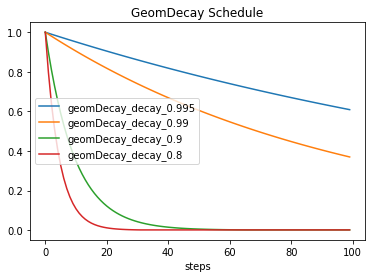

In [141]:
plt.plot(s_geo_1_995, label='geomDecay_decay_0.995')
plt.plot(s_geo_1_99, label='geomDecay_decay_0.99')
plt.plot(s_geo_1_9, label='geomDecay_decay_0.9')
plt.plot(s_geo_1_80, label='geomDecay_decay_0.8')
plt.legend()
plt.title('GeomDecay Schedule')
plt.xlabel('steps')

In [28]:
s_exp=[]
schedule_exp = mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.1, min_temp=0.01)
for i in range(100):
    s_exp.append(schedule_exp.evaluate(i))
    


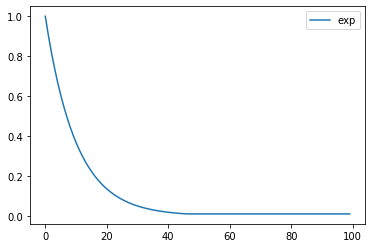

In [29]:
#.plot(s, label='geom')
plt.plot(s_exp, label='exp')
plt.legend()

In [18]:
df_run_stats_new

,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,17.0,0.014109,"[6, 3, 4, 6, 2, 7, 4, 4]",150,0.4,100
1,10,26.0,0.241955,"[0, 5, 5, 0, 6, 3, 7, 2]",150,0.4,100
2,100,28.0,1.806323,"[4, 1, 5, 0, 6, 3, 7, 2]",150,0.4,100
3,0,17.0,0.009452,"[6, 3, 4, 6, 2, 7, 4, 4]",150,0.5,100
4,10,26.0,0.189567,"[1, 3, 6, 0, 7, 2, 0, 5]",150,0.5,100
5,100,28.0,1.775206,"[6, 1, 3, 0, 7, 4, 2, 5]",150,0.5,100
6,0,17.0,0.008622,"[6, 3, 4, 6, 2, 7, 4, 4]",150,0.6,100
7,10,27.0,0.165912,"[5, 1, 4, 6, 0, 3, 7, 2]",150,0.6,100
8,100,28.0,1.665557,"[4, 1, 5, 0, 6, 3, 7, 2]",150,0.6,100
9,0,17.0,0.013645,"[6, 3, 4, 6, 2, 7, 4, 4]",200,0.4,100


In [153]:

eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga, time_curve_ga = mlrose_hiive.genetic_alg(problem_cust, pop_size=150, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

eval_curves_ga = eval_curves

print (best_fitness_ga)

28.0


In [25]:
experiment_name = 'mmc'
def avg_mmc_runner(random_state):
    
    mmc = MIMICRunner(problem=problem_cust,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=42,
                      iteration_list=[10,100],
                      max_attempts=100,
                      keep_percent_list=[0.25, 0.5, 0.75],
                     population_sizes = [100,200,500],
                 use_fast_mimic = True)

    df_run_stats, df_run_curves = mmc.run() 
    for i in random_state:
        mmc = MIMICRunner(problem=problem_cust,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=i,
                      iteration_list=[10,100],
                      max_attempts=100,
                      keep_percent_list=[0.25, 0.5, 0.75],
                     population_sizes = [100,200,500],
                 use_fast_mimic = True)
        
        
        df_run_stats_local, _ = mmc.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats

In [26]:
agg = avg_mmc_runner([1, 42, 100])

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[7], iteration:[10], done:[False], time:[0.17], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[97], iteration:[100], done:[True], time:[1.32], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitne

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[97], iteration:[100], done:[True], time:[1.33], fitness:[26.0000]
	[2. 4. 6. 0. 3. 5. 0. 7.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.75], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[23.0000]
	[5 3 4 0 7 1 3 5]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.75], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[6], iteration:[10], done:[False], time:[0.15], fitness:[26.0000]
	[3. 6. 4. 1. 5. 0. 6. 4.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.75], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[96], iteration:[100], done:[True], time:[1.33], fitness:[26.0000]
	[3. 6. 4. 1. 5. 0. 6. 4.]...

***************
*** Ru

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[9], iteration:[10], done:[False], time:[0.23], fitness:[27.0000]
	[0. 7. 3. 0. 6. 1. 5. 2.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[99], iteration:[100], done:[True], time:[1.90], fitness:[27.0000]
	[0. 7. 3. 0. 6. 1. 5. 2.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[200], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[9], iteration:[10], done:[False], time:[0.21], fitness:[27.0000]
	[2. 4. 7. 3. 0. 6. 1. 6.]...

use_fast_mimic:[True], p

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.75], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[99], iteration:[100], done:[True], time:[1.86], fitness:[26.0000]
	[7. 0. 1. 5. 2. 6. 3. 3.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[22.0000]
	[0 0 3 7 7 7 0 2]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[4], iteration:[10], done:[False], time:[0.32], fitness:[28.0000]
	[3. 1. 7. 4. 6. 0. 2. 5.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[mmc], attempt:[94], iteration:[100], done:[True], time:[3.28], fitness:[28.0000]
	[3. 1. 7. 4. 6. 0. 2. 5.]...

***************
*** R

In [27]:
agg.head()

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,17.0,0.012868,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.25,100
1,10,28.0,0.168550,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
2,100,28.0,1.321596,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
3,0,17.0,0.008220,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.50,100
4,10,27.0,0.140163,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100


In [28]:
agg_new = agg.groupby(['Iteration', 'Population Size', 'Keep Percent']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Population Size,Keep Percent,Fitness,Time,use_fast_mimic,max_iters
26,100,500,0.75,28.0,3.547353,True,100
24,100,500,0.25,28.0,3.509554,True,100
22,100,200,0.50,28.0,1.936443,True,100
18,100,100,0.25,28.0,1.321596,True,100
9,10,100,0.25,28.0,0.168550,True,100
15,10,500,0.25,28.0,0.449178,True,100
14,10,200,0.75,27.0,0.219290,True,100
25,100,500,0.50,27.0,3.388022,True,100
23,100,200,0.75,27.0,1.877350,True,100
21,100,200,0.25,27.0,2.141665,True,100


In [146]:
mmc = MIMICRunner(problem=problem_cust,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=42,
                      iteration_list=range(10, 100, 10),
                      max_attempts=100,
                      keep_percent_list=[0.25, 0.5, 0.75],
                     population_sizes = [100,200,500],
                 use_fast_mimic = True)

In [147]:
df_run_stats, df_run_curves = mmc.run() 

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[7], iteration:[10], done:[False], time:[0.16], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[17], iteration:[20], done:[False], time:[0.31], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[27], iteration:[30], done:[False], time:[0.44], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

use_fast_mimic:[True], pop_size:[10

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[49], iteration:[50], done:[False], time:[1.04], fitness:[27.0000]
	[0. 7. 3. 0. 6. 1. 5. 2.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[59], iteration:[60], done:[False], time:[1.25], fitness:[27.0000]
	[0. 7. 3. 0. 6. 1. 5. 2.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[69], iteration:[70], done:[False], time:[1.43], fitness:[27.0000]
	[0. 7. 3. 0. 6. 1. 5. 2.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[79], iteration:[80], done:[False], time:[1.64], fitness:[27.0000]
	[0. 7. 3. 0. 6. 1. 5. 2.]...

use_fast_mimic:[True], pop_size:[200], keep_pct:[0.25], max_iters:[90]
runner_name:[mimic], 

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[6], iteration:[10], done:[False], time:[0.39], fitness:[27.0000]
	[6. 1. 3. 0. 7. 7. 4. 2.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[16], iteration:[20], done:[False], time:[0.75], fitness:[27.0000]
	[6. 1. 3. 0. 7. 7. 4. 2.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[26], iteration:[30], done:[False], time:[1.13], fitness:[27.0000]
	[6. 1. 3. 0. 7. 7. 4. 2.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[90]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[36], iteration:[40], done:[False], time:[1.58], fitness:[27.0000]
	[6. 1. 3. 0. 7. 7. 4. 2.]...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.5], max_iters:[90]
runner_name:[mimic], experi

In [151]:
df_run_stats[df_run_stats.Fitness==28].to_csv('queens_mmimic.csv',index=False)

In [35]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,17.0,0.008792,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.25,100
1,10,28.0,0.151844,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
2,100,28.0,1.216777,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
3,0,17.0,0.006095,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.50,100
4,10,27.0,0.132243,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100
5,100,27.0,1.267546,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100
6,0,17.0,0.007039,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.75,100
7,10,26.0,0.135781,"[0.0, 7.0, 4.0, 6.0, 3.0, 1.0, 7.0, 5.0]",True,100,0.75,100
8,100,26.0,1.306249,"[0.0, 7.0, 4.0, 6.0, 3.0, 1.0, 7.0, 5.0]",True,100,0.75,100
9,0,17.0,0.010025,"[6, 3, 4, 6, 2, 7, 4, 4]",True,200,0.25,100


In [152]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic, time_curve_mimic = mlrose_hiive.mimic(problem_cust,  pop_size=100, keep_pct=0.25,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

28.0


Text(0, 0.5, 'Time')

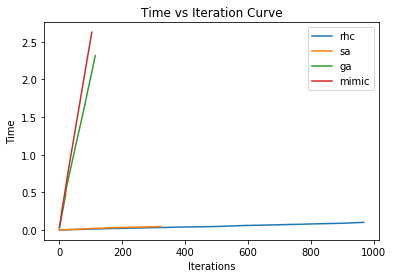

In [64]:
plt.plot(time_curve_rhc, label = 'rhc')
plt.plot(time_curve_sa, label = 'sa')
plt.plot(time_curve_ga, label = 'ga')
plt.plot(time_curve_mimic, label='mimic')
plt.legend()
plt.title("Time vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

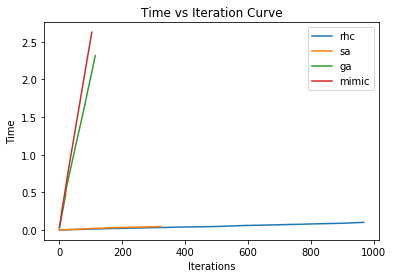

In [27]:
plt.plot(time_curve_rhc, label = 'rhc')
plt.plot(time_curve_sa, label = 'sa')
plt.plot(time_curve_ga, label = 'ga')
plt.plot(time_curve_mimic, label='mimic')
plt.legend()
plt.title("Time vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Time")

Text(0, 0.5, 'Fitness')

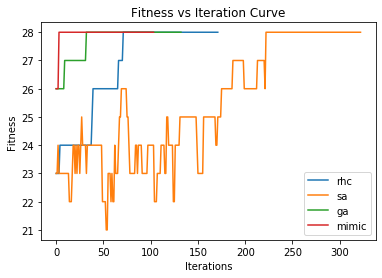

In [185]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

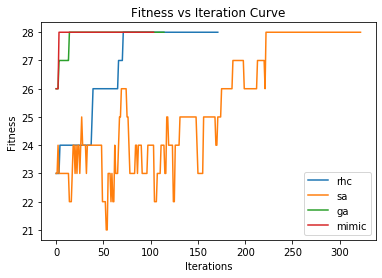

In [45]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()
plt.title("Fitness vs Iteration Curve")
plt.xlabel("Iterations")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

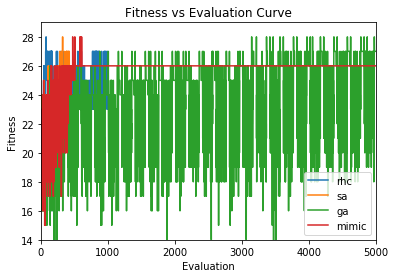

In [55]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_mimic, label = 'mimic')
plt.legend()
plt.axis([0, 5000, 14, 29])
plt.title("Fitness vs Evaluation Curve")
plt.xlabel("Evaluation")
plt.ylabel("Fitness")

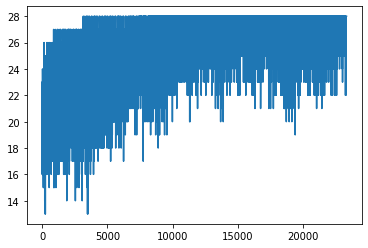

In [52]:
plt.plot(eval_curves_ga, label = 'ga')

In [56]:
### Input 

In [31]:
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_4 = mlrose_hiive.DiscreteOpt(length = 4, fitness_fn = fitness_cust, maximize = True, max_val = 4)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_8 = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_16 = mlrose_hiive.DiscreteOpt(length = 16, fitness_fn = fitness_cust, maximize = True, max_val = 16)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_32 = mlrose_hiive.DiscreteOpt(length = 32, fitness_fn = fitness_cust, maximize = True, max_val = 32)

fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_64 = mlrose_hiive.DiscreteOpt(length = 64, fitness_fn = fitness_cust, maximize = True, max_val = 64)

In [32]:
best_fitness_rhc_list = []
best_time_rhc_list = []
max_eval_rhc_list = []
for p,i in [(problem_4,4),(problem_8,8), (problem_16,16), (problem_32,32), (problem_64, 64)]:
    eval_curves = [] 
    #best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 1)
    best_state, best_fitness_rhc, fitness_curve_rhc, time= mlrose_hiive.random_hill_climb(p, restarts = 15, 
                                                          max_attempts = 100, max_iters = 1000, curve=True,
                                                          init_state = None, random_state = 1)
    #best_state, best_fitness_rhc_100, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
    #                                                      max_attempts = 100, max_iters = 1000, curve=True,
    #                                                      init_state = None, random_state = 100)

    best_fitness_rhc_list.append(best_fitness_rhc)
    best_time_rhc_list.append(max(time))
    max_eval_rhc_list.append(len(eval_curves))

In [33]:
print (best_fitness_rhc_list)
print (best_time_rhc_list)
print (max_eval_rhc_list)

[6.0, 28.0, 118.0, 493.0, 2004.0]
[0.07504510879516602, 0.17300200462341309, 0.5299944877624512, 4.044832229614258, 25.145758152008057]
[1816, 2643, 3157, 6097, 9650]


In [34]:
best_fitness_ga_list = []
best_time_ga_list = []
max_eval_ga_list = []
for p,i in [(problem_4,4),(problem_8,8), (problem_16,16), (problem_32,32), (problem_64, 64)]:
    eval_curves = [] 
    best_state, best_fitness_ga, fitness_curve_ga, time= mlrose_hiive.genetic_alg(p, pop_size=150, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                    minimum_elites=0, minimum_dregs=0, mutation_prob=0.4,
                    max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

    #eval_curves_ga_list = eval_curves
    best_fitness_ga_list.append(best_fitness_ga)
    best_time_ga_list.append(max(time))
    max_eval_ga_list.append(len(eval_curves))
print (best_fitness_ga_list)
print (best_time_ga_list)
print (max_eval_ga_list)

[6.0, 28.0, 119.0, 493.0, 2007.0]
[1.1792852878570557, 1.9897675514221191, 5.048990726470947, 33.34950137138367, 121.4484190940857]
[15403, 20237, 24015, 47729, 46836]


In [37]:
# Define alternative N-Queens fitness function for maximization problem

best_fitness_sa_list = []
best_time_sa_list = []
max_eval_sa_list = []
#schedule = ExpDecay()
for p,i in [(problem_4,4),(problem_8,8), (problem_16,16), (problem_32,32), (problem_64, 64)]:
    eval_curves = [] 


    # Initialize custom fitness function object



    best_state, best_fitness, fitness_curve_sa, time = mlrose_hiive.simulated_annealing(p, schedule = schedule, 
                                                          max_attempts = 100, max_iters = 1000, curve=True,
                                                          init_state = None, random_state = 1)

    best_fitness_sa_list.append(best_fitness)
    best_time_sa_list.append(max(time))
    max_eval_sa_list.append(len(eval_curves))

print (best_fitness_sa_list)
print (best_time_sa_list)
print (max_eval_sa_list)

[6.0, 28.0, 118.0, 492.0, 2004.0]
[0.016013145446777344, 0.03298807144165039, 0.27300095558166504, 0.8659992218017578, 3.2975258827209473]
[400, 425, 1031, 1158, 1184]


In [38]:
best_fitness_mimic_list = []
best_time_mimic_list = []
max_eval_mimic_list = []
for p,i in [(problem_4,4),(problem_8,8), (problem_16,16), (problem_32,32), (problem_64, 64)]:
    eval_curves = [] 

    best_state, best_fitness_mimic, fitness_curve_mimic, time= mlrose_hiive.mimic(p,  pop_size=100, keep_pct=0.25,
                    max_attempts=20, max_iters=np.inf, curve=True, random_state=1)

    best_fitness_mimic_list.append(best_fitness_mimic)
    best_time_mimic_list.append(max(time))
    max_eval_mimic_list.append(len(eval_curves))
print (best_fitness_mimic_list)
print (best_time_mimic_list)
print (max_eval_mimic_list)

[6.0, 25.0, 114.0, 474.0, 1963.0]
[0.1790013313293457, 0.690000057220459, 3.5935142040252686, 10.321743488311768, 36.1164665222168]
[2223, 2223, 3135, 2325, 2223]


Text(0, 0.5, 'Fitness')

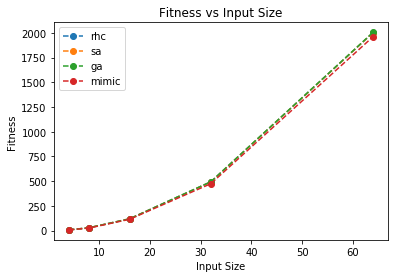

In [39]:
x = [4,8,16,32,64]
plt.plot(x, best_fitness_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, best_fitness_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_fitness_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_fitness_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

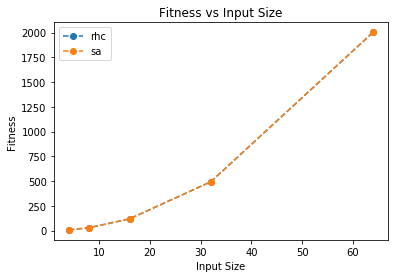

In [42]:
x = [4,8,16,32,64]
plt.plot(x, best_fitness_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, best_fitness_sa_list, ls='--', marker='o',label = 'sa')
#plt.plot(x, best_fitness_ga_list, ls='--', marker='o',label = 'ga')
#plt.plot(x, best_fitness_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

Text(0, 0.5, 'Fitness')

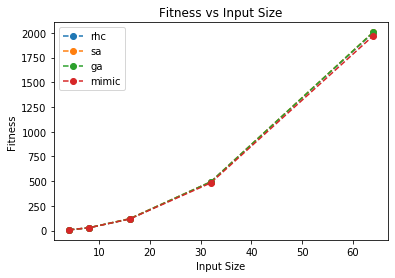

In [60]:
x = [4,8,16,32,64]
plt.plot(x, best_fitness_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, best_fitness_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_fitness_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_fitness_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

In [ ]:
x = [4,8,16,32,64]
plt.plot(x, best_fitness_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, best_fitness_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_fitness_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_fitness_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Fitness vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Fitness")

Text(0, 0.5, 'Time')

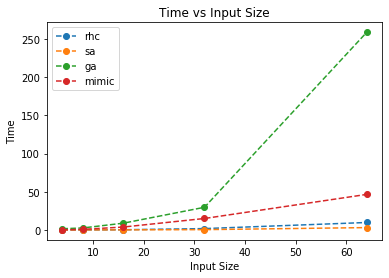

In [61]:
x = [4,8,16,32,64]
plt.plot(x, best_time_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, best_time_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_time_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_time_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Time vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

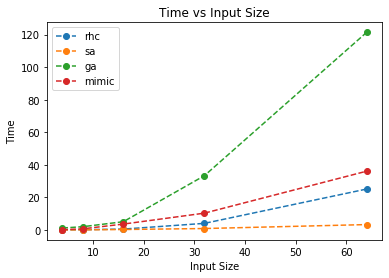

In [40]:
x = [4,8,16,32,64]
plt.plot(x, best_time_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, best_time_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, best_time_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, best_time_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Time vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Time")

Text(0, 0.5, 'Evaluation')

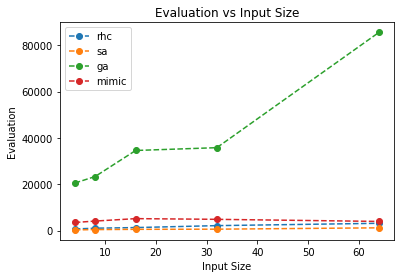

In [63]:
x = [4,8,16,32,64]
plt.plot(x, max_eval_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, max_eval_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, max_eval_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, max_eval_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Evaluation vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Evaluation")

Text(0, 0.5, 'Evaluation')

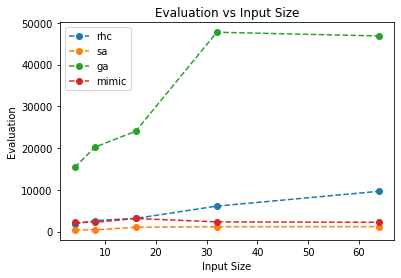

In [41]:
x = [4,8,16,32,64]
plt.plot(x, max_eval_rhc_list, ls='--', marker='o', label = 'rhc')
plt.plot(x, max_eval_sa_list, ls='--', marker='o',label = 'sa')
plt.plot(x, max_eval_ga_list, ls='--', marker='o',label = 'ga')
plt.plot(x, max_eval_mimic_list, ls='--', marker='o',label='mimic')
plt.legend()
plt.plot()

plt.title("Evaluation vs Input Size")
plt.xlabel("Input Size")
plt.ylabel("Evaluation")

# Try to update the code to include fitness vs evaluation curuve 

In [22]:
# test existing curve function 

In [18]:
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

In [19]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 


# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)


best_state, best_fitness, fitness_curve_sa, timve_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_sa = eval_curves

In [20]:
print (len(eval_curves_sa))

698


In [22]:
print (len(timve_curve_sa))

585


In [119]:
eval_curves = [] 
best_state, best_fitness_rhc, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 0, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_rhc = eval_curves

In [154]:
eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga= mlrose_hiive.genetic_alg(problem_cust, pop_size=200, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.1,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

eval_curves_ga = eval_curves

In [158]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=200, keep_pct=0.2,
                max_attempts=20, max_iters=np.inf, curve=True, random_state=1)

eval_curves_mimic = eval_curves

In [ ]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=100, keep_pct=0.25,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

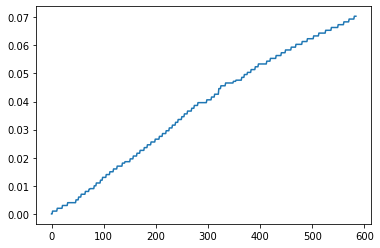

In [23]:
plt.plot(timve_curve_sa, label = 'sa')

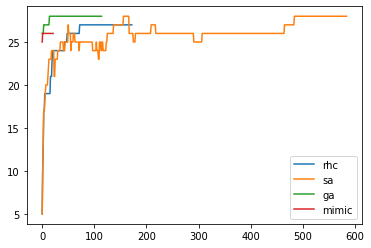

In [159]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()

In [162]:
best_fitness_mimic

26.0

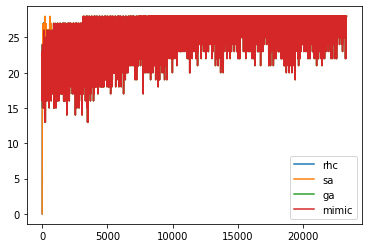

In [161]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_ga, label = 'mimic')
plt.legend()

In [104]:
print (len(eval_curves_sa))

698


In [105]:
len(fitness_curve_sa)

585

### Example 3: Travelling Salesperson Using Coordinate-Defined Fitness Function

In [21]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

In [22]:
# Define optimization problem object
problem_fit = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = False)

In [23]:
# Solve using genetic algorithm - attempt 1
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, random_state = 2)

In [24]:
print(best_state)

[1 3 4 5 6 7 0 2]


In [25]:
print(best_fitness)

18.89580466036301


In [26]:
# Solve using genetic algorithm - attempt 2
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [27]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [28]:
print(best_fitness)

17.34261754766733


### Example 4: Travelling Salesperson Using Distance-Defined Fitness Function

In [29]:
# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), (0, 5, 5.3852),
             (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), (1, 3, 2.8284), (1, 4, 2.0000),
             (1, 5, 4.1231), (1, 6, 4.2426), (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361),
             (2, 5, 4.4721), (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056),
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), (4, 7, 2.2361),
             (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances = dist_list)

In [30]:
# Define optimization problem object
problem_fit2 = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_dists, maximize = False)

In [31]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit2, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [32]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [33]:
print(best_fitness)

17.3428


### Example 5: Travelling Salesperson Defining Fitness Function as Part of Optimization Problem Definition Step

In [34]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Define optimization problem object
problem_no_fit = mlrose_hiive.TSPOpt(length = 8, coords = coords_list, maximize = False)

In [35]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2)

In [36]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [37]:
print(best_fitness)

17.34261754766733


### Example 6: Fitting a Neural Network to the Iris Dataset

In [38]:
# Load the Iris dataset
data = load_iris()

In [39]:
# Get feature values of first observation
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [40]:
# Get feature names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# Get target value of first observation
print(data.target[0])

0


In [42]:
# Get target name of first observation
print(data.target_names[data.target[0]])

setosa


In [43]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[4.3 2.  1.  0.1]


In [44]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[7.9 4.4 6.9 2.5]


In [45]:
# Get unique target values
print(np.unique(data.target))

[0 1 2]


In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [47]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\ghaye\AppData\Local\conda\conda\envs\mlrose_test\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [49]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

In [50]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [51]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [52]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

In [53]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.625


In [54]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5666666666666667


### Example 7: Fitting a Logistic Regression to the Iris Data

In [55]:
# Initialize logistic regression object and fit object - attempt 1
lr_model1 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.0001, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, 
                                      random_state = 3)

lr_model1.fit(X_train_scaled, y_train_hot)

In [56]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [57]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [58]:
# Initialize logistic regression object and fit object - attempt 2

lr_model2 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.01, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100,
                                      random_state = 3)

lr_model2.fit(X_train_scaled, y_train_hot)

In [59]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [60]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


### Example 8: Fitting a Logistic Regression to the Iris Data using the NeuralNetwork() class

In [61]:
# Initialize neural network object and fit object - attempt 1
lr_nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.0001, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model1.fit(X_train_scaled, y_train_hot)

In [62]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [63]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [64]:
# Initialize neural network object and fit object - attempt 2
lr_nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model2.fit(X_train_scaled, y_train_hot)

In [65]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [66]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7
